In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from copy import deepcopy
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

#### Dataset Link: https://www.kaggle.com/kianwee/foreign-exchange-rate-1994-2020

# Data Loading

In [2]:
originaldata = pd.read_csv(r'C:\Users\kommi\Documents\S5\ML\Project\Exchange_Rate_Report.csv')

In [3]:
originaldata.describe()

,Algerian dinar (DZD),Australian dollar (AUD),Austrian schilling (ATS),Belgian franc (BEF),Botswana pula (BWP),Brazilian real (BRL),Brunei dollar (BND),Canadian dollar (CAD),Chilean peso (CLP),Chinese yuan (CNY),...,South African rand (ZAR),Spanish peseta (ESP),Swedish krona (SEK),Swiss franc (CHF),Thai baht (THB),Trinidadian dollar (TTD),U.A.E. dirham (AED),U.K. pound (GBP),U.S. dollar (USD),Uruguayan peso (UYU)
count,2287.000000,6381.000000,1236.000000,993.000000,5131.000000,6127.000000,5168.000000,6308.000000,5207.000000,5104.000000,...,6123.000000,1223.000000,6305.000000,6439.000000,6093.000000,5986.000000,6598.000000,6563.000000,6697.0,2108.000000
mean,95.750555,0.762778,11.334135,33.134852,0.187994,23.522967,1.496079,1.275644,572.300405,7.281247,...,8.353815,136.244716,7.847176,1.200411,34.499999,6.322398,3.672266,1.589525,1.0,26.094563
std,17.986033,0.136274,0.988560,3.166331,0.414504,175.959465,0.188630,0.179188,82.450954,0.836744,...,3.290221,11.133943,1.105440,0.244789,5.670173,0.226999,0.000545,0.184522,0.0,5.580171
min,71.293000,0.483300,9.569000,27.837500,0.085500,0.827000,1.200900,0.917000,377.500000,6.093000,...,3.400000,118.380000,5.842500,0.725300,24.440000,5.572100,3.671000,1.203100,1.0,9.320000
25%,78.327550,0.679800,10.479250,30.392500,0.110050,1.722400,1.351175,1.107200,506.880000,6.536325,...,6.156500,126.510000,6.920000,0.983050,31.008000,6.257400,3.672500,1.483850,1.0,20.843250
50%,98.283800,0.751400,11.159000,32.187500,0.149800,2.144800,1.430750,1.314550,544.500000,6.915350,...,7.570000,132.990000,7.734500,1.173600,33.904000,6.284000,3.672500,1.583000,1.0,26.402000
75%,111.407700,0.828000,12.202250,36.342500,0.182000,3.046150,1.690500,1.388950,642.210000,8.276800,...,10.569000,145.715000,8.517500,1.375450,38.968000,6.401600,3.672500,1.663250,1.0,29.739500
max,121.088700,1.105500,13.294000,38.962500,4.841400,2698.000000,1.851000,1.613200,816.260000,8.746000,...,16.770850,159.360000,10.995000,1.822800,56.061000,6.788900,3.675000,2.102000,1.0,39.152000


# Data Preprocessing

In [4]:
print(originaldata.columns[0:10])

Index(['Date', 'Algerian dinar   (DZD)                     ',
       'Australian dollar   (AUD)                     ',
       'Austrian schilling   (ATS)                     ',
       'Belgian franc   (BEF)                     ',
       'Botswana pula   (BWP)                     ',
       'Brazilian real   (BRL)                     ',
       'Brunei dollar   (BND)                     ',
       'Canadian dollar   (CAD)                     ',
       'Chilean peso   (CLP)                     '],
      dtype='object')


In [5]:
uncleaned_columns = originaldata.columns
def remove_spaces(s):
    g = ''
    k = 0
    for x in s:
        if(x != ' '):
            if(k):
                g += ' '
            k = 0
            g += x
        else:
            k+=1
    return g

In [6]:
cleaned_columns = []
for x in uncleaned_columns:
    cleaned_columns.append(remove_spaces(x))
print(cleaned_columns)

['Date', 'Algerian dinar (DZD)', 'Australian dollar (AUD)', 'Austrian schilling (ATS)', 'Belgian franc (BEF)', 'Botswana pula (BWP)', 'Brazilian real (BRL)', 'Brunei dollar (BND)', 'Canadian dollar (CAD)', 'Chilean peso (CLP)', 'Chinese yuan (CNY)', 'Colombian peso (COP)', 'Czech koruna (CZK)', 'Danish krone (DKK)', 'Deutsche mark (DEM)', 'Estonian kroon (EEK)', 'Euro (EUR)', 'Finnish markka (FIM)', 'French franc (FRF)', 'Greek drachma (GRD)', 'Indian rupee (INR)', 'Irish pound (IEP)', 'Israeli New Shekel (ILS)', 'Italian lira (ITL)', 'Japanese yen (JPY)', 'Korean won (KRW)', 'Kuwaiti dinar (KWD)', 'Luxembourg franc (LUF)', 'Malaysian ringgit (MYR)', 'Maltese lira (MTL)', 'Mauritian rupee (MUR)', 'Mexican peso (MXN)', 'Netherlands guilder (NLG)', 'New Zealand dollar (NZD)', 'Norwegian krone (NOK)', 'Omani rial (OMR)', 'Peruvian sol (PEN)', 'Philippine peso (PHP)', 'Polish zloty (PLN)', 'Portuguese escudo (PTE)', 'Qatari riyal (QAR)', 'Russian ruble (RUB)', 'Saudi Arabian riyal (SAR)', 

In [7]:
originaldata.columns = cleaned_columns
print(originaldata['Date'])

0       3-Jan-1994
1       4-Jan-1994
2       5-Jan-1994
3       6-Jan-1994
4       7-Jan-1994
           ...    
6732           NaN
6733           NaN
6734           NaN
6735           NaN
6736           NaN
Name: Date, Length: 6737, dtype: object


In [8]:
data = []
for x in originaldata.columns[1:len(originaldata.columns)]:
    data.append(originaldata[[originaldata.columns[0],x]])

In [9]:
print(len(data))

53


### Removing rows for which the data was not available

In [10]:
print(data[0])

            Date  Algerian dinar (DZD)
0     3-Jan-1994                   NaN
1     4-Jan-1994                   NaN
2     5-Jan-1994                   NaN
3     6-Jan-1994                   NaN
4     7-Jan-1994                   NaN
...          ...                   ...
6732         NaN                   NaN
6733         NaN                   NaN
6734         NaN                   NaN
6735         NaN                   NaN
6736         NaN                   NaN

[6737 rows x 2 columns]


In [11]:
for i in range(len(data)):
    columns = data[i].columns
    removalRows = []
    for j in range(data[i].shape[0]):
        if(math.isnan(data[i][columns[1]].values[j])):
            removalRows.append(j)
    temp = data[i].drop(removalRows,axis = 0)
    data[i] = deepcopy(temp)

In [12]:
print(data[0])

             Date  Algerian dinar (DZD)
4253  14-May-2010               74.9996
4259  24-May-2010               75.2979
4260  25-May-2010               75.6136
4261  26-May-2010               75.4628
4262  27-May-2010               75.5750
...           ...                   ...
6695  24-Feb-2020              120.9095
6696  25-Feb-2020              120.7883
6697  26-Feb-2020              120.7145
6698  27-Feb-2020              120.5406
6699  28-Feb-2020              120.0978

[2287 rows x 2 columns]


In [13]:
print(len(data))

53


### Removing currencies for which the recent data was not available

In [14]:
goodCurrencies = []
for i in range(len(data)):
    if(len(data[i][columns[0]]) == 0):
        continue
    lastDate = data[i][columns[0]].values[-1]
    if(lastDate[len(lastDate)-4:len(lastDate)]=='2020'):
        goodCurrencies.append(data[i])
data = goodCurrencies
print(len(data))

39


### Changing string dates to numpy.datetime64 using pandas

In [15]:
for i in range(len(data)):
    data[i]['Date'] = pd.to_datetime(data[i]['Date'].values)

In [16]:
print(type(data[0]['Date'].values[0]))

<class 'numpy.datetime64'>


In [17]:
for i in range(len(data)):
    data[i].set_index('Date',inplace = True)

## Summarizing and visualization

In [18]:
sns.set(rc={'figure.figsize':(11, 4)})

In [19]:
majorCurrencies = ['Australian dollar (AUD)','Chinese yuan (CNY)','Euro (EUR)',
                  'Indian rupee (INR)','Japanese yen (JPY)','U.K. pound (GBP)']

Text(0.5, 0.98, 'Major Exchange Rates')

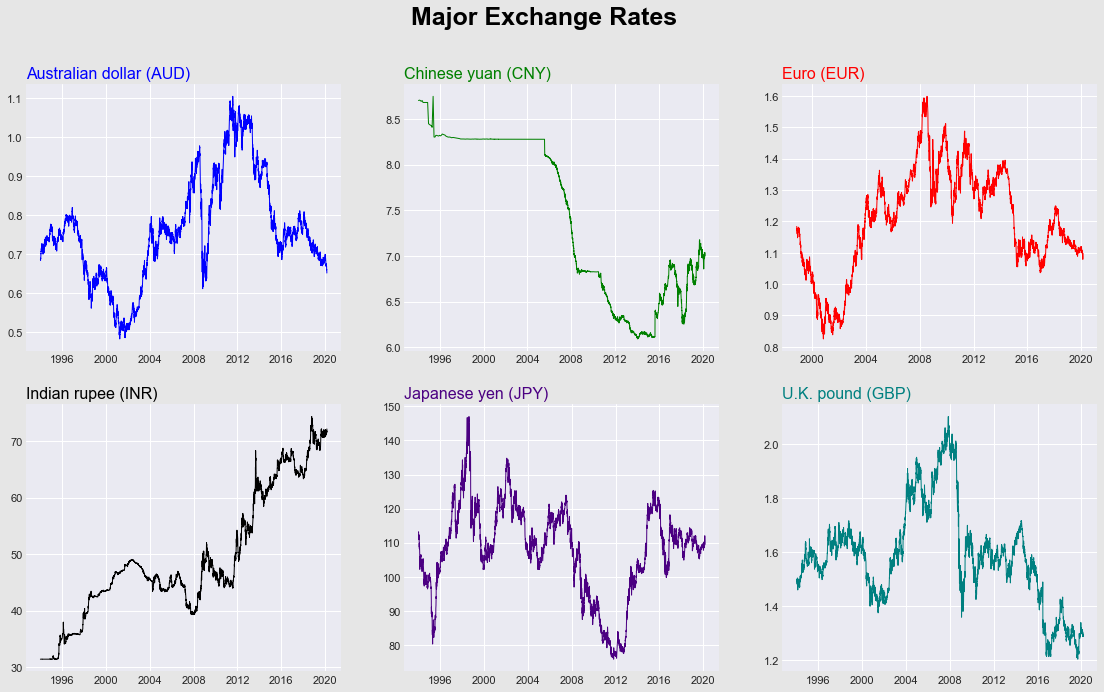

In [20]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
plt.style.use('seaborn-darkgrid')
palette = ['magenta','blue','green','red',
          'black','indigo','teal']
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    plt.subplot(2,3, num)
    plt.plot(x[x.columns[0]], marker='', color=palette[num], linewidth=1, alpha=1, label=x.columns[0])
    plt.title(x.columns[0], loc='left', fontsize=16, fontweight=0, color=palette[num] )
plt.suptitle("Major Exchange Rates", fontsize=25, fontweight=0, color='black', weight = 'bold', y=0.98)

### Scatterplot

Text(0.5, 0.98, 'Major Exchange Rates')

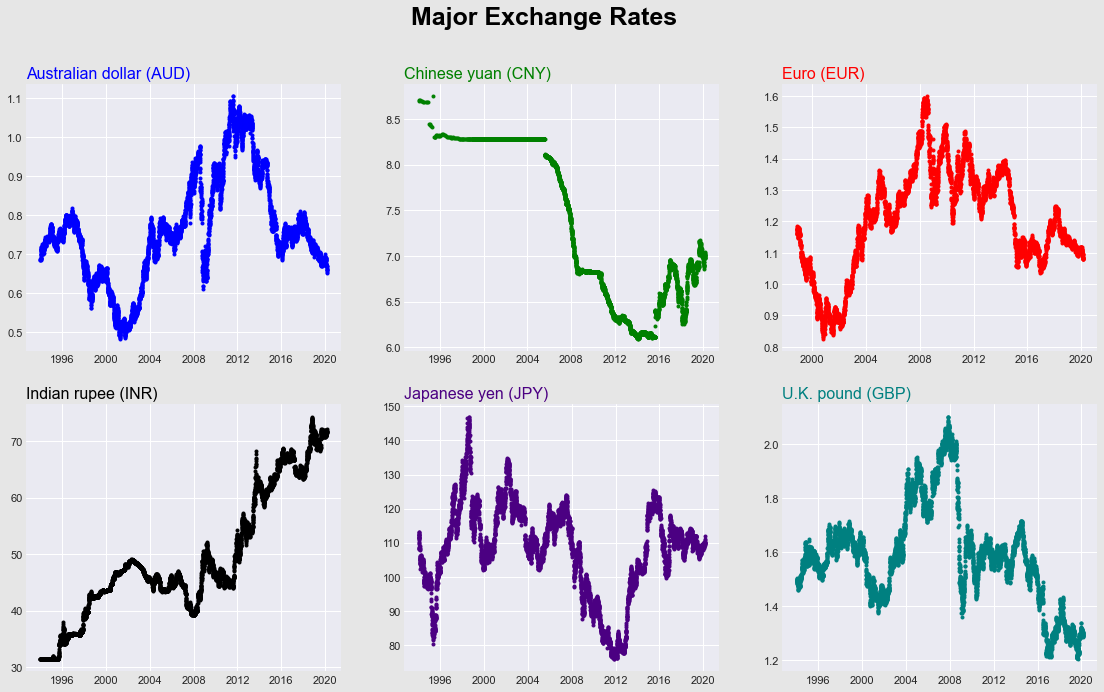

In [21]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    plt.subplot(2,3, num)
    plt.plot(x[x.columns[0]], marker='.', color=palette[num], alpha=1, label=x.columns[0],linestyle = 'None')
    plt.title(x.columns[0], loc='left', fontsize=16, fontweight=0, color=palette[num] )
plt.suptitle("Major Exchange Rates", fontsize=25, fontweight=0, color='black', weight = 'bold', y=0.98)

### Bloxplots

<Figure size 1382.4x777.6 with 0 Axes>

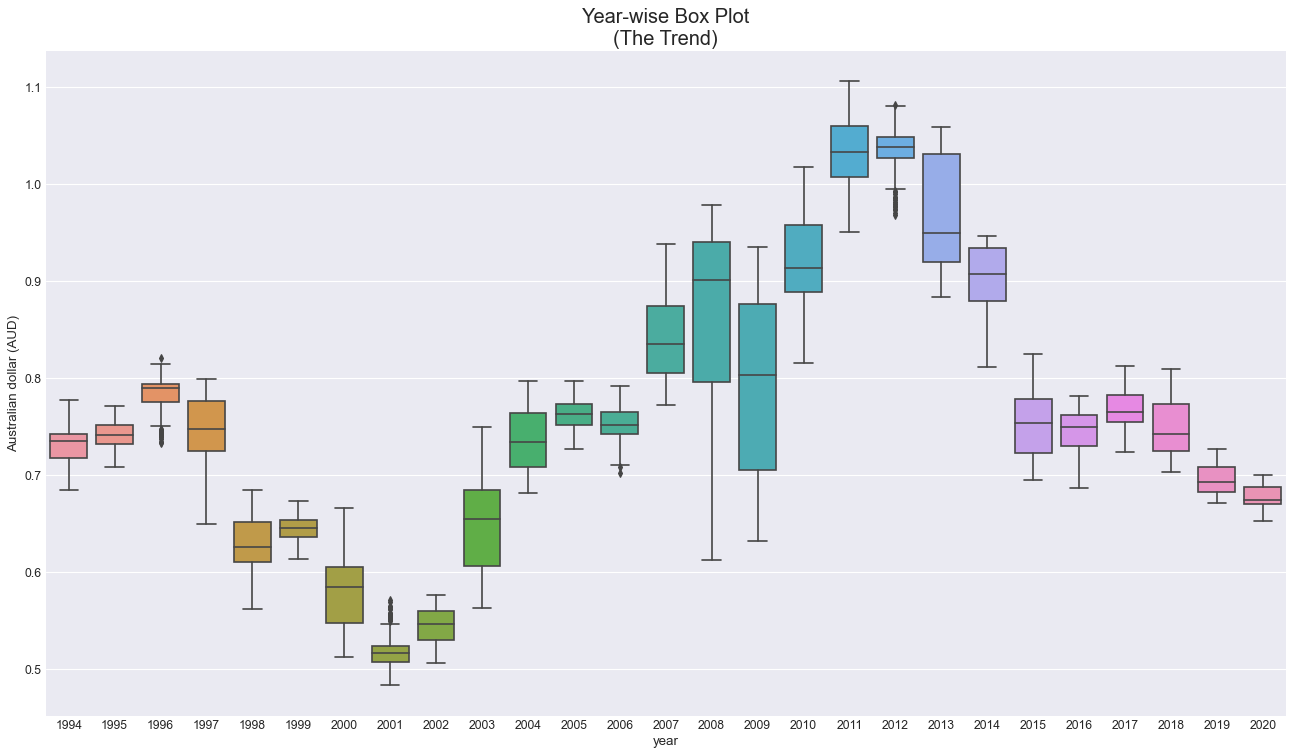

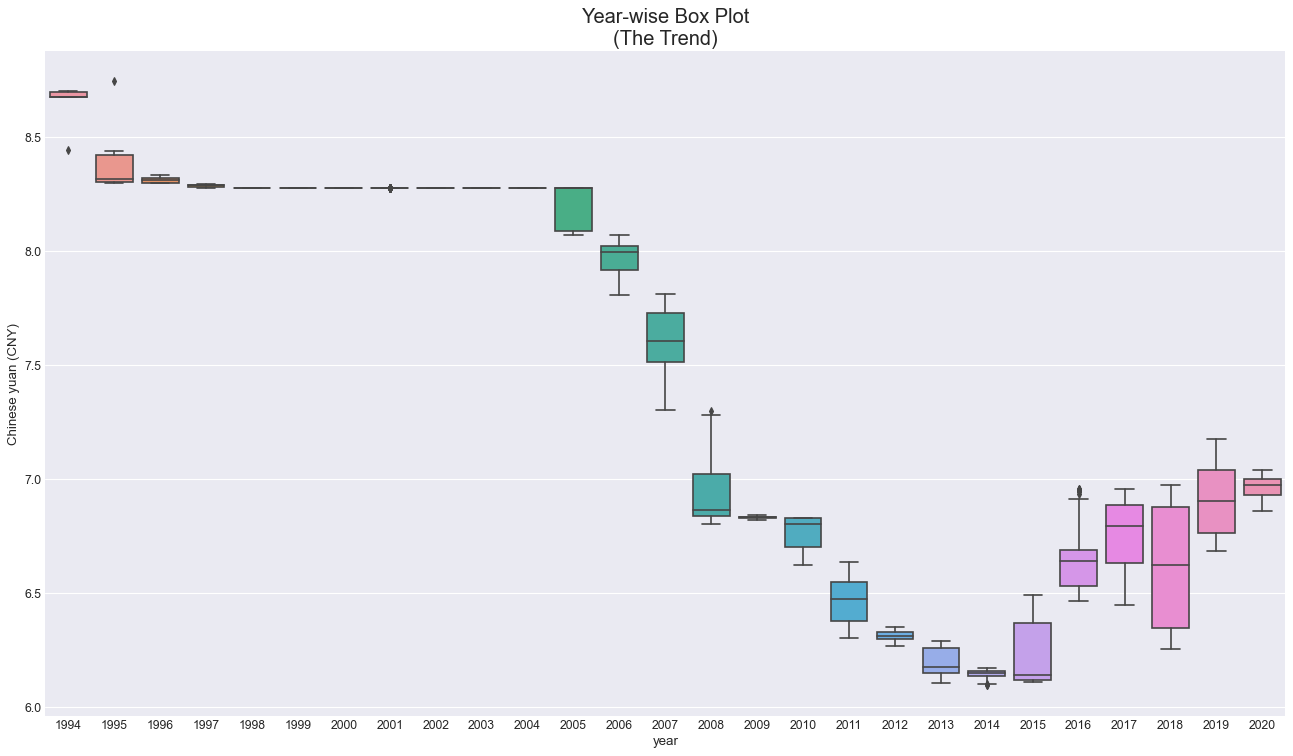

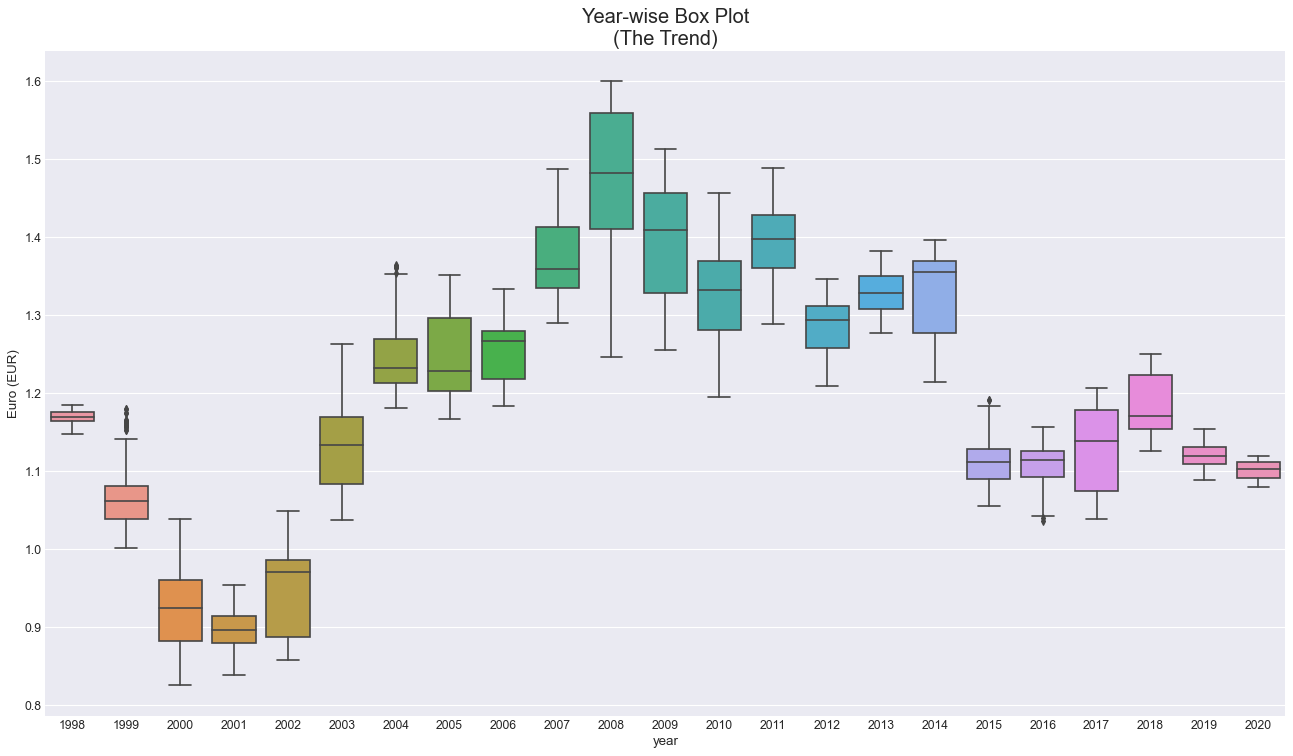

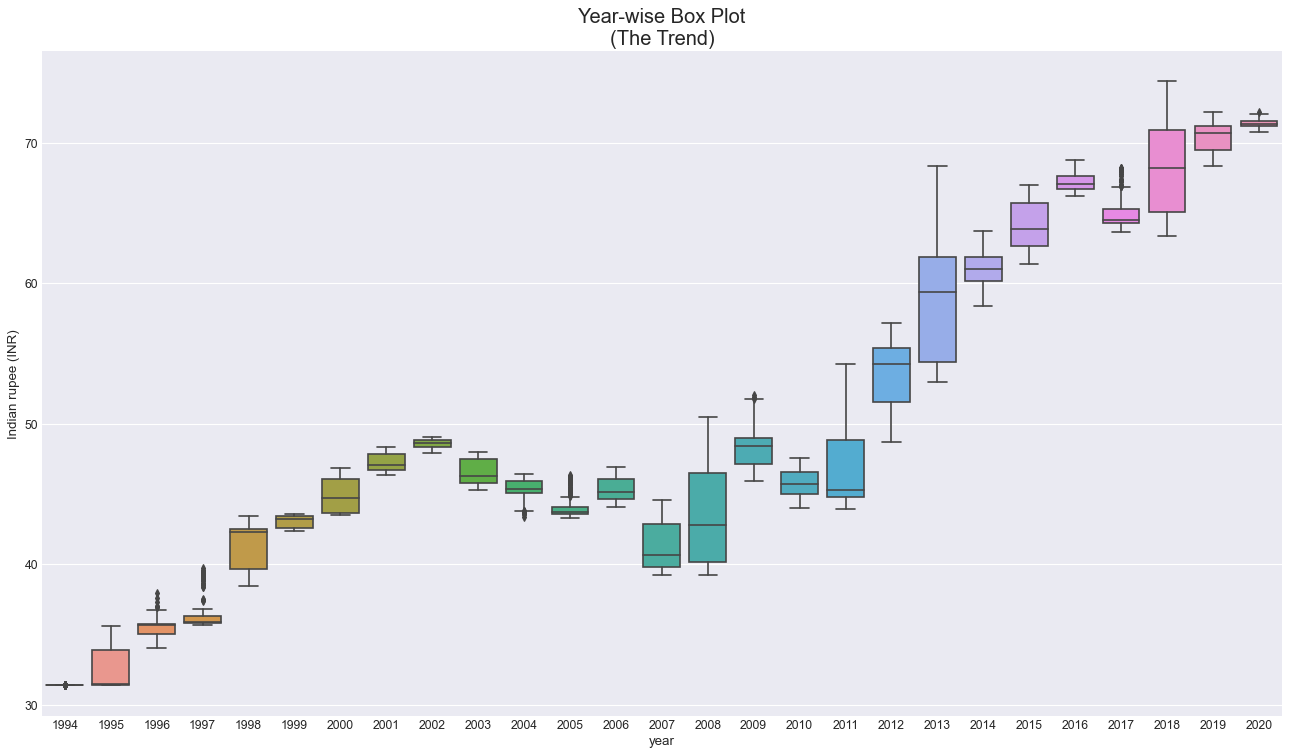

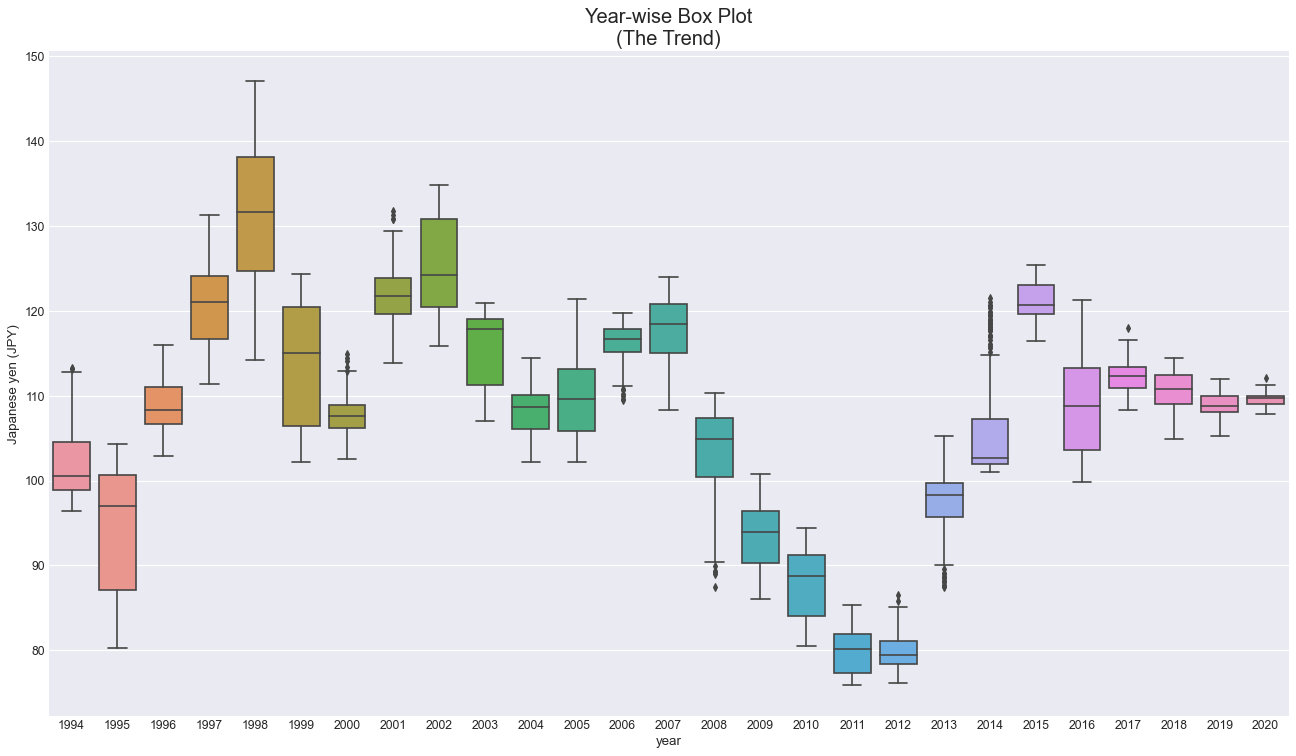

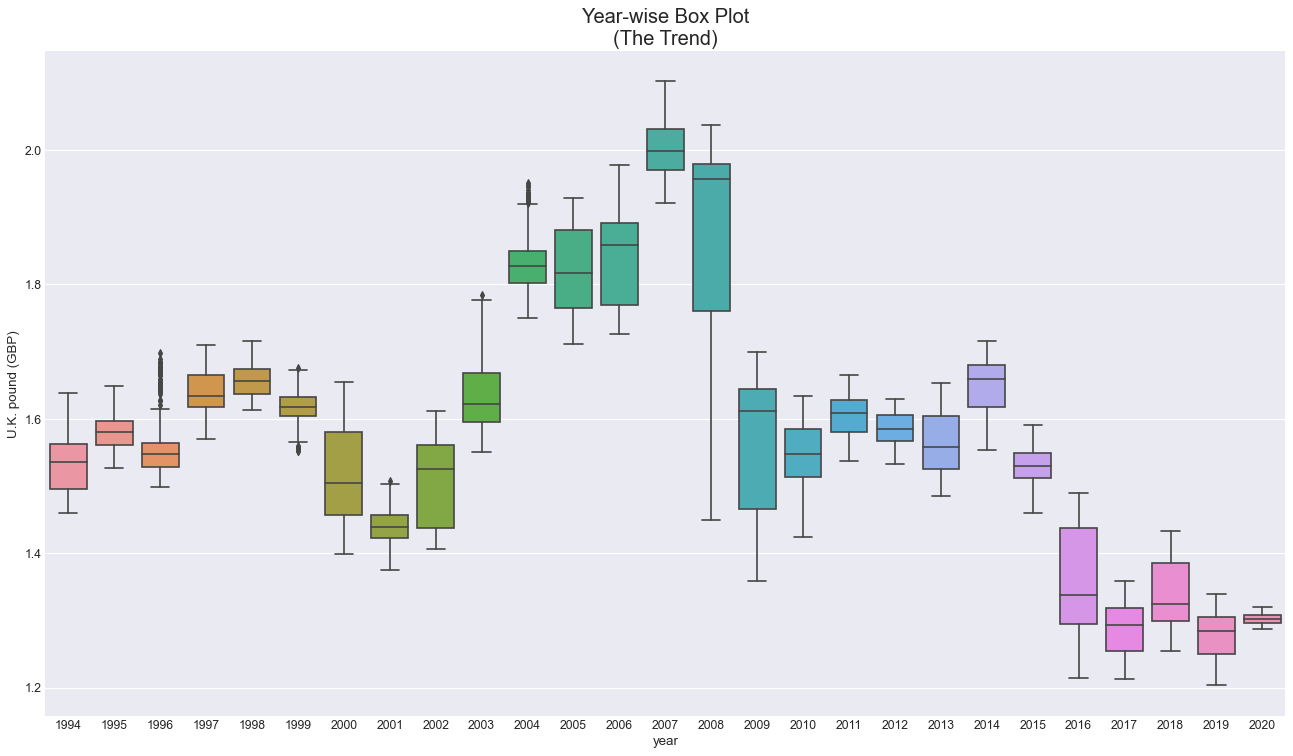

In [22]:
plt.figure(figsize=(19.2,10.8), facecolor = (0.900, 0.900, 0.900))
plt.style.use('seaborn-darkgrid')
palette = ['magenta','blue','green','red',
          'black','indigo','teal']
num=0
for x in data:
    if x.columns[0] not in majorCurrencies:
        continue
    num+=1
    df = deepcopy(x)
    df.reset_index(inplace=True)
    df['year'] = [d.year for d in df.Date]
    df['month'] = [d.strftime('%b') for d in df.Date]
    years = df['year'].unique()
    fig, axes = plt.subplots(1, figsize=(20,11), dpi= 80)
    sns.boxplot(x='year', y=df.columns[1], data=df, ax=axes)
    axes.set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
    plt.show()

## Auto Correlation Function Plot

In [23]:
df = deepcopy(data[12])

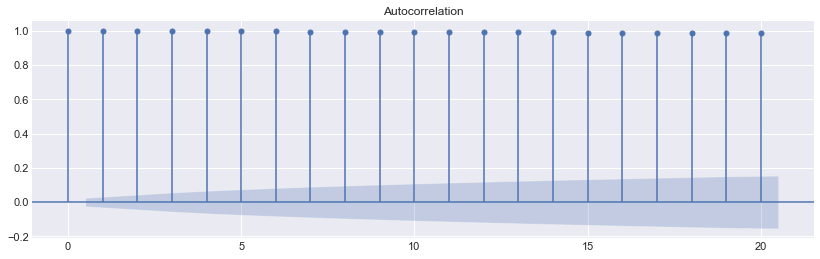

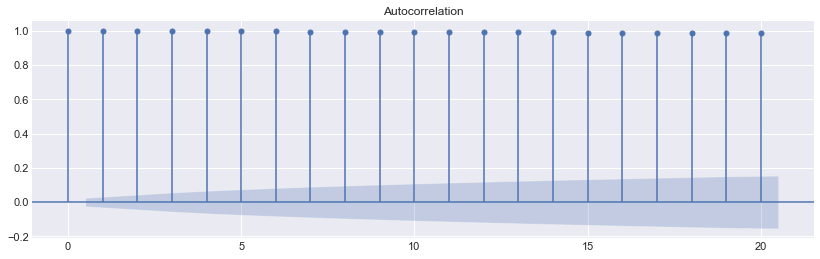

In [24]:
fig, axes = plt.subplots(1, figsize=(14,4))
plot_acf(df[df.columns[0]],lags = 20, ax = axes)

## Seasonal Decomposition

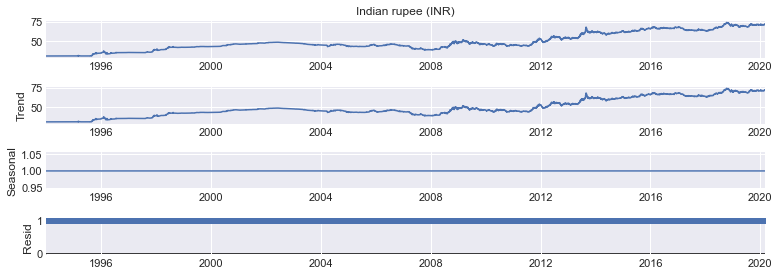

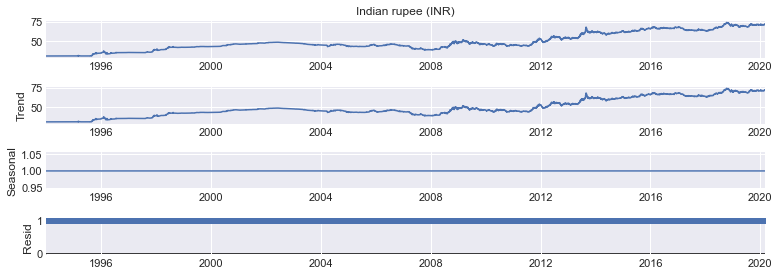

In [25]:
sdec = seasonal_decompose(df[df.columns[0]], model = 'multiplicative', period = 1)
sdec.plot()

# Forecasting using Polynomial Regression

In [26]:
df = deepcopy(data[12])
df.reset_index(inplace = True)

In [27]:
test_size = 20
train = df[:-test_size]
test = df[-test_size:]
print(type(train[train.columns[1]].values))

<class 'numpy.ndarray'>


In [30]:
class PolynomialRegression:
    def __init__(self,degree = 2):
        self.degree = degree
        self.w = np.zeros(degree+1)
    
    def convert_and_fit(self, data):
        y = deepcopy(data)
        x = []
        for i in range(len(y)):
            temp = []
            for j in range(self.degree+1):
                temp.append((i+1)**j)
            x.append(np.array(temp))
        x = np.array(x)
        self.trainlen = len(x)
        self.fit(x,y)
        
        y_pred = self.predict(x)
        
        self.enddiff = (y_pred[-1]-y[-1])
        
        plt.figure(figsize = (10,5))
        plt.title('Training graph')
        plt.plot(y, label = 'Actual',color = 'g')
        plt.plot(y_pred, label = 'Predicted', color = 'r')
        plt.legend()
    
    def fit(self, x, y, iterations = 50, learning_rate = 0.1):
        m = x.shape[0]

        for _ in range(iterations):
            y_pred = self.predict(x)
            residuals = y_pred - y
            gradients = np.dot(x.T, residuals)
            self.w = self.w - (learning_rate / m) * gradients

    def predict(self, x):
        res = []
        for i in range(len(x)):
            cur = 0
            for j in range(len(self.w)):
                cur += self.w[j]*x[i][j]
            res.append(cur)
        return np.array(res)
    
    def nextValues(self, k):
        x = []
        for i in range(self.trainlen,self.trainlen+k):
            temp = []
            for j in range(len(self.w)):
                temp.append((i+1)**j)
            x.append(temp)
        y_pred = self.predict(np.array(x))
        for i in range(len(y_pred)):
            y_pred[i] -= self.enddiff
        return y_pred

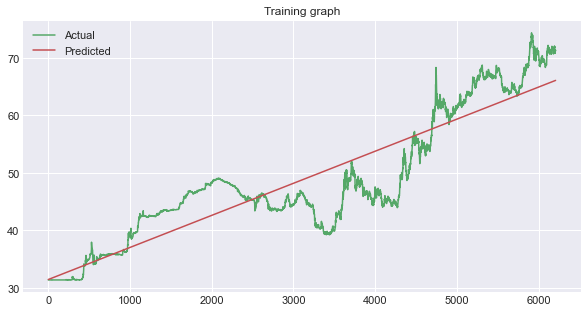

In [31]:
model = PolynomialRegression(degree = 1)
model.convert_and_fit(train[train.columns[1]].values)

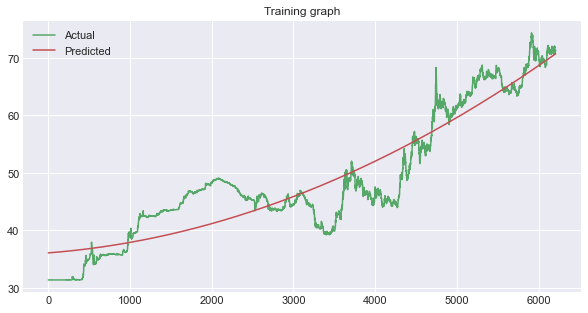

In [32]:
model = PolynomialRegression(degree = 2)
model.convert_and_fit(train[train.columns[1]].values)

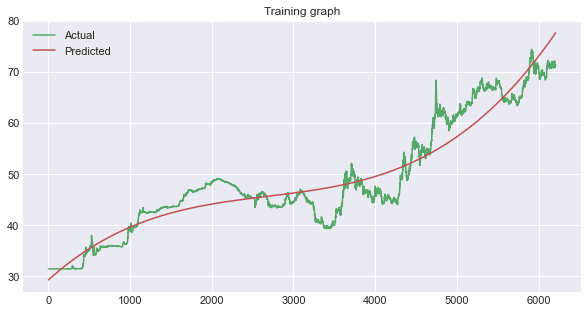

In [33]:
model = PolynomialRegression(degree = 3)
model.convert_and_fit(train[train.columns[1]].values)

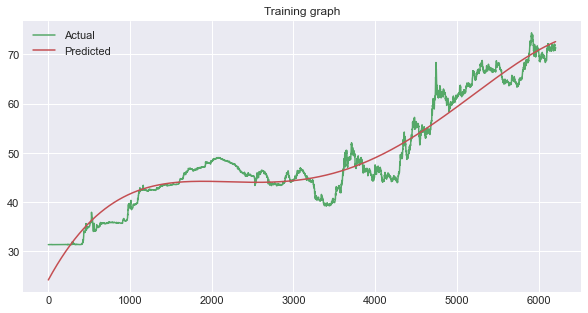

In [34]:
model = PolynomialRegression(degree = 4)
model.convert_and_fit(train[train.columns[1]].values)

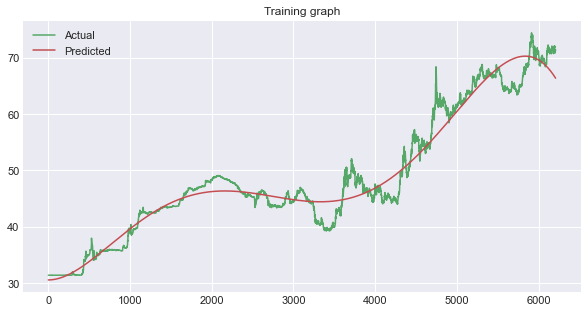

In [35]:
model = PolynomialRegression(degree = 5)
model.convert_and_fit(train[train.columns[1]].values)

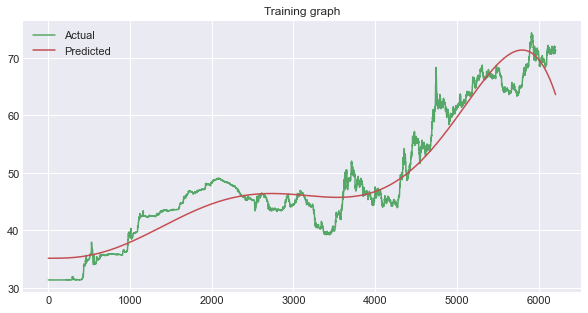

In [36]:
model = PolynomialRegression(degree = 6)
model.convert_and_fit(train[train.columns[1]].values)

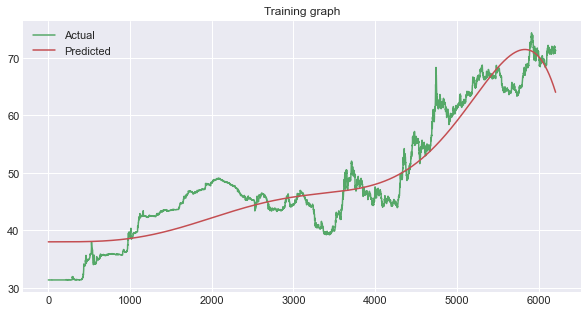

In [37]:
model = PolynomialRegression(degree = 7)
model.convert_and_fit(train[train.columns[1]].values)

## On test data

Root Mean Squared Error: 0.2508352197745233
R2-score: 0.10188769767937389


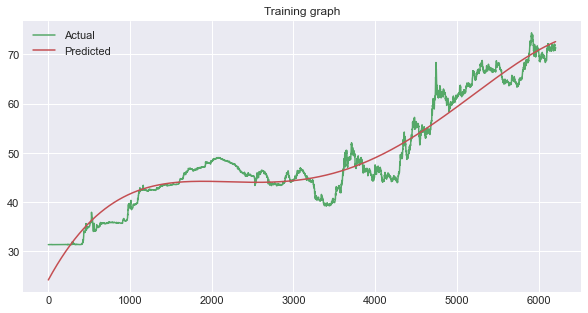

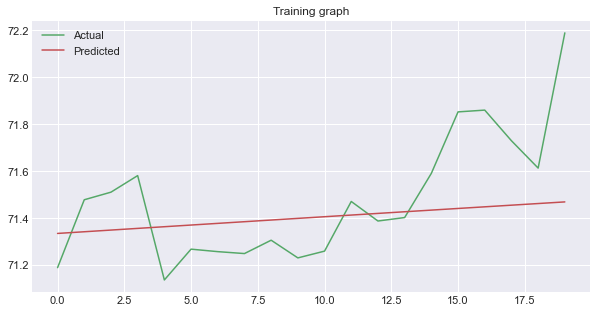

In [38]:
test_size = 20
train = df[:-test_size]
test = df[-test_size:]

model = PolynomialRegression(degree = 4)
model.convert_and_fit(train[train.columns[1]].values)

y_pred = model.nextValues(test_size)

plt.figure(figsize = (10,5))
plt.title('Training graph')
plt.plot(test[test.columns[1]].values, label = 'Actual',color = 'g')
plt.plot(y_pred, label = 'Predicted', color = 'r')
plt.legend()

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[test.columns[1]], y_pred)))
print('R2-score:',r2_score(test[test.columns[1]], y_pred))

Root Mean Squared Error: 0.3018312293288945
R2-score: 0.21473658422994912


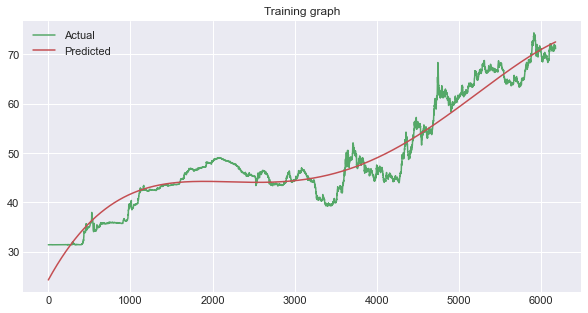

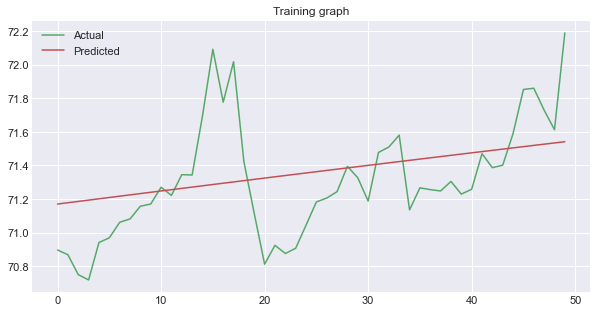

In [39]:
test_size = 50
train = df[:-test_size]
test = df[-test_size:]

model = PolynomialRegression(degree = 4)
model.convert_and_fit(train[train.columns[1]].values)

y_pred = model.nextValues(test_size)

plt.figure(figsize = (10,5))
plt.title('Training graph')
plt.plot(test[test.columns[1]].values, label = 'Actual',color = 'g')
plt.plot(y_pred, label = 'Predicted', color = 'r')
plt.legend()

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[test.columns[1]], y_pred)))
print('R2-score:',r2_score(test[test.columns[1]], y_pred))

Root Mean Squared Error: 0.5895668136557639
R2-score: -1.7048073595453017


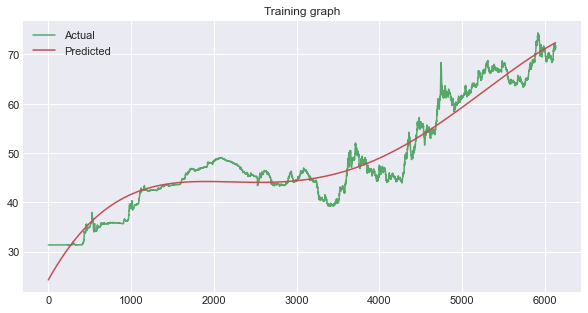

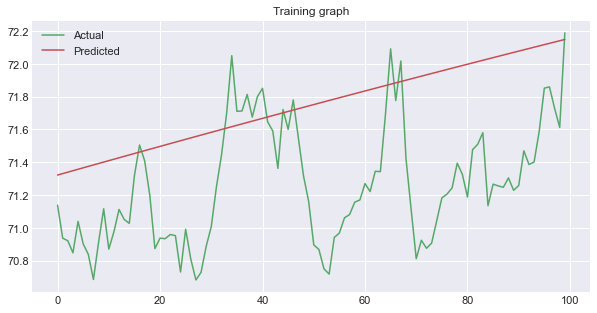

In [40]:
test_size = 100
train = df[:-test_size]
test = df[-test_size:]

model = PolynomialRegression(degree = 4)
model.convert_and_fit(train[train.columns[1]].values)

y_pred = model.nextValues(test_size)

plt.figure(figsize = (10,5))
plt.title('Training graph')
plt.plot(test[test.columns[1]].values, label = 'Actual',color = 'g')
plt.plot(y_pred, label = 'Predicted', color = 'r')
plt.legend()

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[test.columns[1]], y_pred)))
print('R2-score:',r2_score(test[test.columns[1]], y_pred))

Root Mean Squared Error: 2.264156479050702
R2-score: 0.22373378192741544


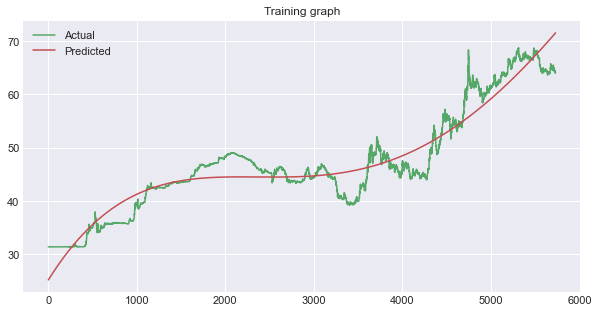

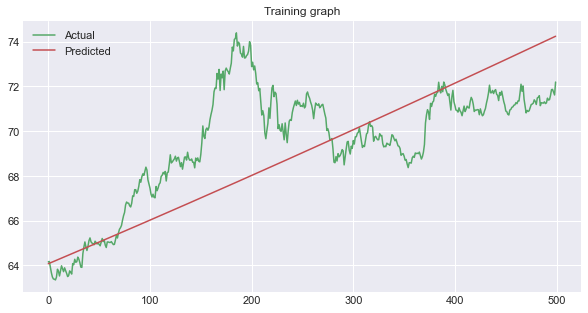

In [41]:
test_size = 500
train = df[:-test_size]
test = df[-test_size:]

model = PolynomialRegression(degree = 4)
model.convert_and_fit(train[train.columns[1]].values)

y_pred = model.nextValues(test_size)

plt.figure(figsize = (10,5))
plt.title('Training graph')
plt.plot(test[test.columns[1]].values, label = 'Actual',color = 'g')
plt.plot(y_pred, label = 'Predicted', color = 'r')
plt.legend()

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(test[test.columns[1]], y_pred)))
print('R2-score:',r2_score(test[test.columns[1]], y_pred))